In [165]:
import glob
import os
import csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from analysisFunctions import getFiloMetrics

In [166]:
""" 
Make style adjustments for plots
"""

sns.set(style="ticks", context="talk", font_scale=2)
plt.style.use("dark_background")
plt.figure(figsize=(500,500))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 20})

<Figure size 36000x36000 with 0 Axes>

In [167]:
"""
Get latest file with filopodia lengths over time
"""
list_of_files = glob.glob('../filoLengthFiles/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)

In [168]:
"""
Store file name and content
"""
fileName = latest_file.split('/')[2].replace(".txt", "")
f = open(latest_file, "r")
content = f.read()
f.close()

In [169]:
print(fileName)

filo_lengths_filvary_1.500000_epsilon_0.900000_VconcST0.040000_GRADIENT2_FILTIPMAX15.000000_tokenStrength1.000000_FILSPACING2_actinMax550.000000_randFilExtend-1.000000_randFilRetract-1.000000_run_1_


In [170]:
"""
CONSTANTS
"""
TIME_STEP = 15

In [171]:
"""
Get lengths recorded for each filopodium
"""
lengthsPerFilo = {}
# Get list of lengths for each filo
lines = content.split("\n")
for line in lines:
    if line != '': 
        elements = line.split(",")
        filo = elements[0]
        length = float(elements[1])
        if filo not in lengthsPerFilo: 
            lengthsPerFilo[filo] = []
        lengthsPerFilo[filo].append(length) 

# Quit this script if file is empty
if len(lengthsPerFilo) == 0:
    exit()

In [172]:
# DEBUGGING
# print(list(lengthsPerFilo.values())[0])
# for lengths in list(lengthsPerFilo.values())[0]:
#     print(len(lengths))

[rcParams](https://stackoverflow.com/a/41717533)

In [173]:
plt.rcParams["figure.figsize"] = (20,10)

with help from [this](https://stackoverflow.com/a/52067407)

In [174]:
# DEBUGGING
# for lengths in list(lengthsPerFilo.values())[0]:
#     plt.plot(lengths)
# plt.plot(list(lengthsPerFilo.values())[2324])

In [175]:
"""
Get lists for each metric
"""
metrics = getFiloMetrics(list(lengthsPerFilo.values()), TIME_STEP)

maxLenArr = metrics["maxLen"]
avgExtTimeArr = metrics["averageExtendingTime"]
avgRetTimeArr = metrics["averageRetractingTime"]
timeAtMaxArr = metrics["timeAtMax"]
extArr = metrics["timePerExtension"]
retArr = metrics["timePerRetraction"]


In [176]:
# DEBUGGING
# print(list(lengthsPerFilo.items())[140])

In [177]:
# DEBUGGING
# print(maxLenArr[0])
# print(avgExtTimeArr[0])
# print(avgRetTimeArr[0])
# print(timeAtMaxArr[0])

In [178]:
"""
Retrive invivo distributions for each metric
"""
maxLensIV = []
avgExtIV = []
avgRetIV = []
timeAtMaxIV = []
extTimesIV = []
retTimesIV = []

with open('invivo/maxLensIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            maxLensIV.append(value)
with open('invivo/avgExtIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            avgExtIV.append(value)
with open('invivo/avgRetIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            avgRetIV.append(value)
with open('invivo/timeAtMaxIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            timeAtMaxIV.append(value)
with open('invivo/extTimesIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line:
            extTimesIV.append(value)
with open('invivo/retTimesIV.csv', encoding='utf-8-sig', newline='') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for line in reader:
        for value in line: 
            retTimesIV.append(value)


In [179]:
"""
Get KS statistic for extension and retraction times
"""
ksMaxLen = stats.ks_2samp(maxLenArr, maxLensIV)
ksAvgExt = stats.ks_2samp(avgExtTimeArr, avgExtIV)
ksAvgRet = stats.ks_2samp(avgRetTimeArr, avgRetIV)
ksTimeAtMax = stats.ks_2samp(timeAtMaxArr, timeAtMaxIV)
ksExt = stats.ks_2samp(extArr, extTimesIV)
ksRet = stats.ks_2samp(retArr, retTimesIV)

In [180]:
print(ksMaxLen)
print(ksAvgExt)
print(ksAvgRet)
print(ksTimeAtMax)
print(ksExt)
print(ksRet)

KstestResult(statistic=0.7674469465640943, pvalue=2.201633666365555e-39)
KstestResult(statistic=0.37688721389909846, pvalue=1.507369568282551e-08)
KstestResult(statistic=0.7570829472357485, pvalue=4.712356504677801e-38)
KstestResult(statistic=0.8628205964889382, pvalue=1.0720190611072577e-54)
KstestResult(statistic=0.6335804357875665, pvalue=4.711208605798627e-25)
KstestResult(statistic=0.7301089779867369, pvalue=8.512810667337106e-35)


# Display distribution curves

Text(0.5, 0, 'Max lengths reached (micron)')

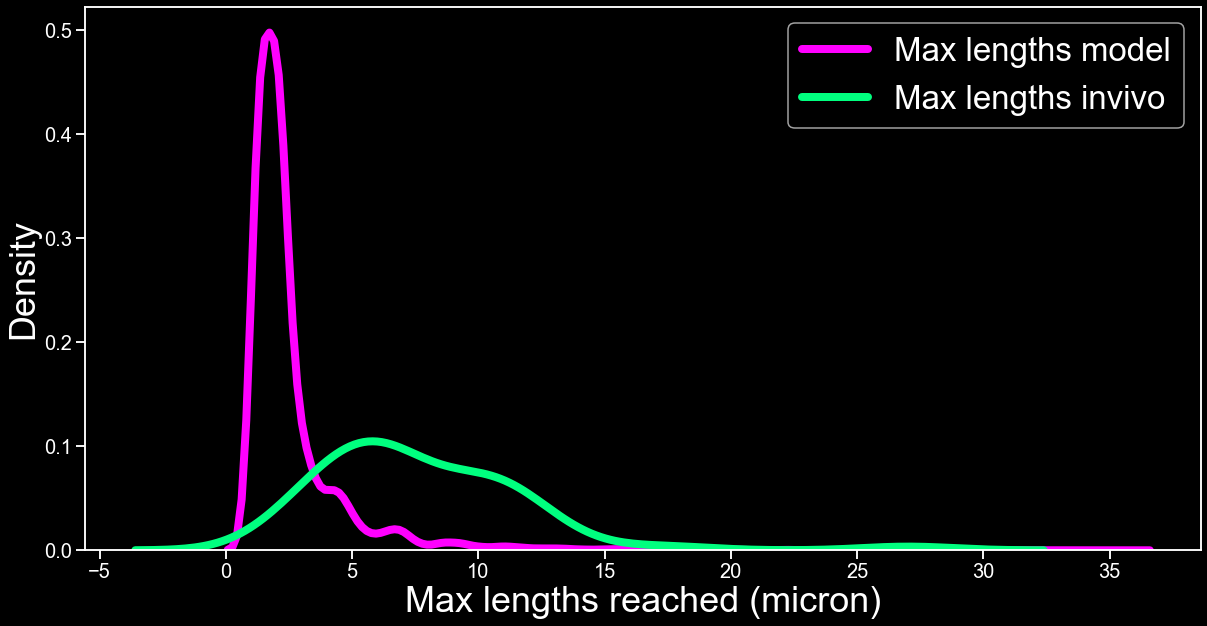

In [181]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(maxLenArr, 
            color='magenta', 
            shade=False, 
            label='Max lengths model',
            linewidth=8)
extPlot = sns.kdeplot(maxLensIV, 
            color='SpringGreen', 
            shade=False, 
            label='Max lengths invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Max lengths reached (micron)")

Text(0.5, 0, 'Average Time During Extension (s)')

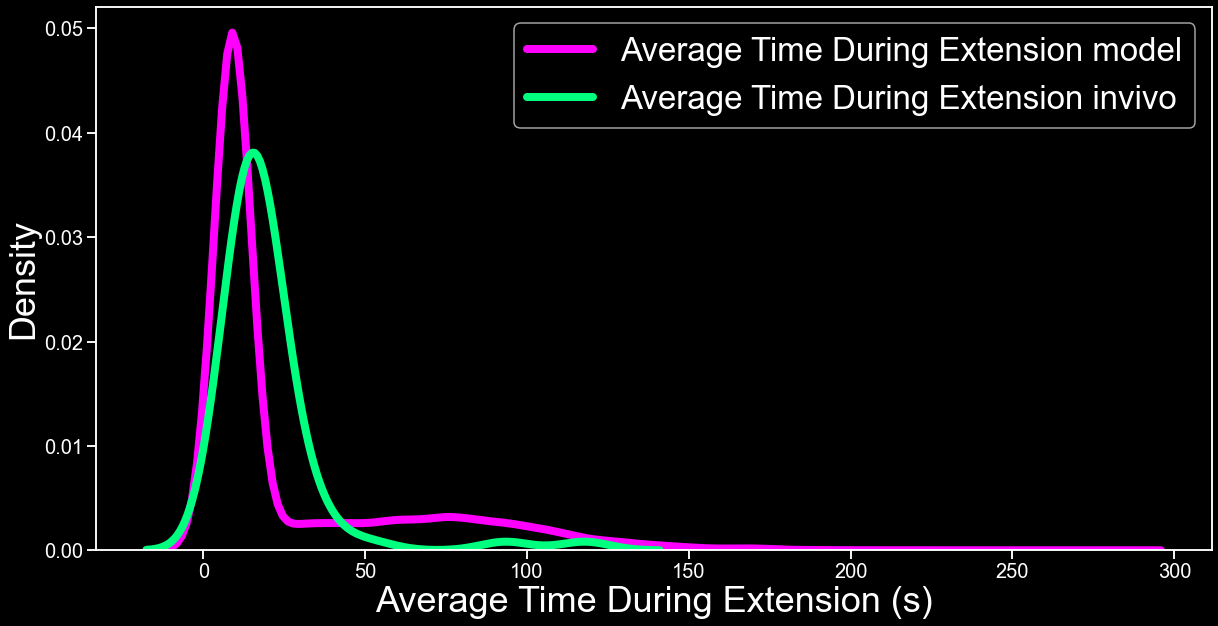

In [182]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(avgExtTimeArr, 
            color='magenta', 
            shade=False, 
            label='Average Time During Extension model',
            linewidth=8)
extPlot = sns.kdeplot(avgExtIV, 
            color='SpringGreen', 
            shade=False, 
            label='Average Time During Extension invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Average Time During Extension (s)")

In [183]:
# DEBUGGING to exaplin why there's a 411 value in te graph above
# print(list(lengthsPerFilo.items())[6778])
# print(max(avgExtTimeArr))
# print(maxLenArr[np.argmax(avgExtTimeArr)])

Text(0.5, 0, 'Average Time During Retraction (s)')

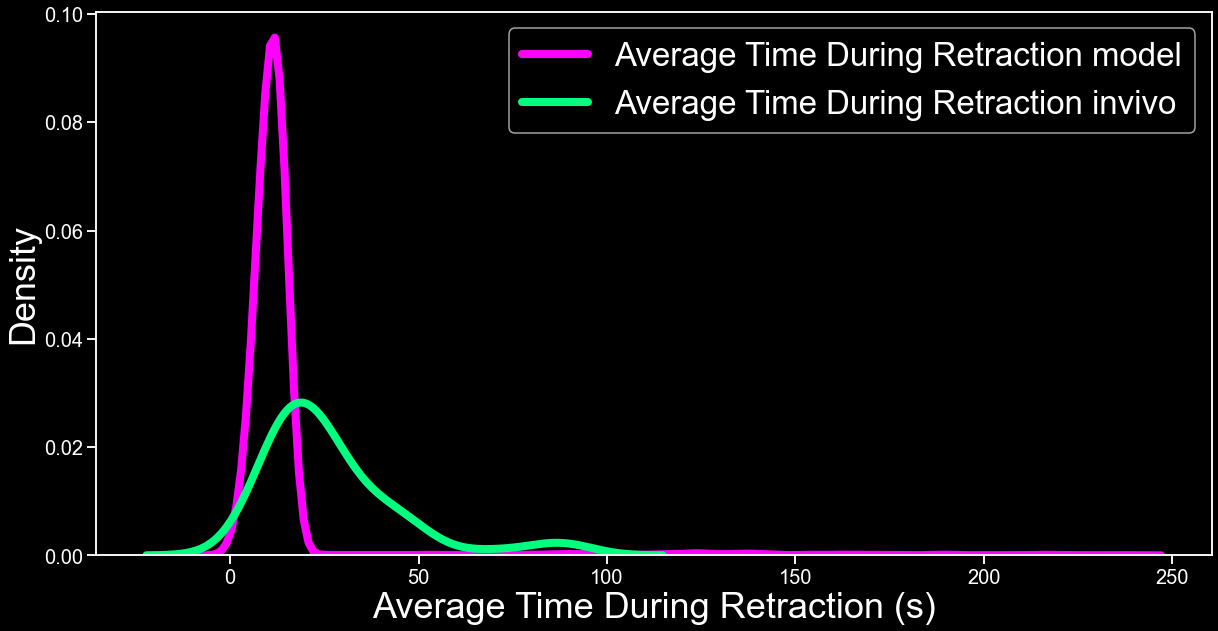

In [184]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(avgRetTimeArr, 
            color='magenta', 
            shade=False, 
            label='Average Time During Retraction model',
            linewidth=8)
extPlot = sns.kdeplot(avgRetIV, 
            color='SpringGreen', 
            shade=False, 
            label='Average Time During Retraction invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Average Time During Retraction (s)")

Text(0.5, 0, 'Time Spent at Max Length (s)')

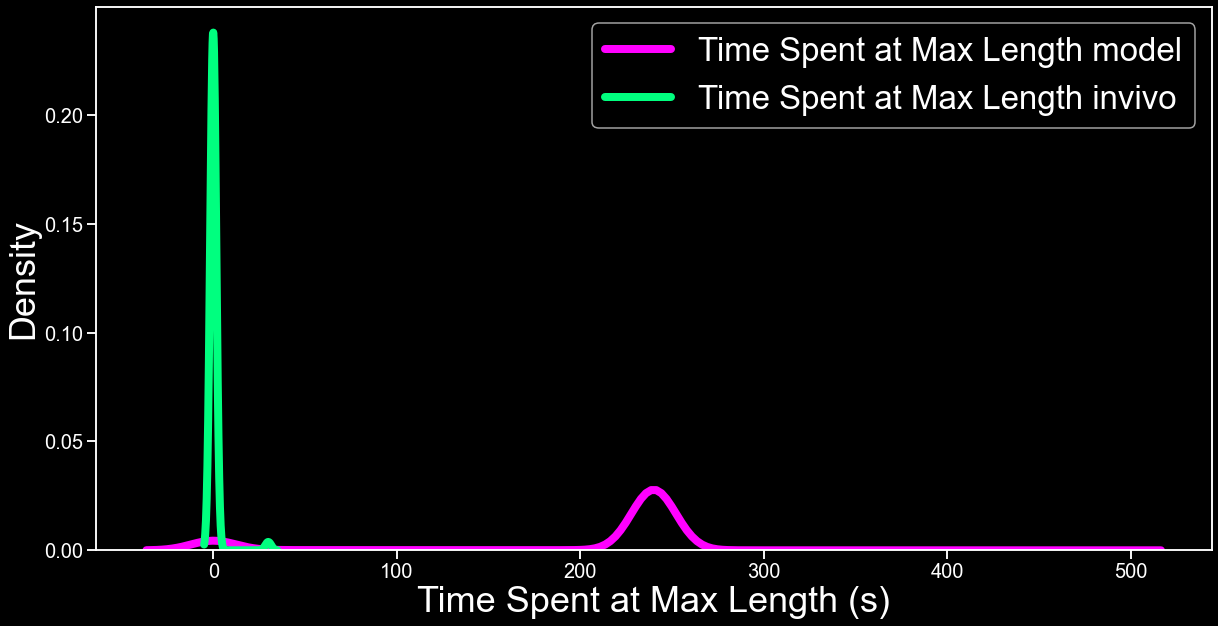

In [185]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(timeAtMaxArr, 
            color='magenta', 
            shade=False, 
            label='Time Spent at Max Length model',
            linewidth=8)
extPlot = sns.kdeplot(timeAtMaxIV, 
            color='SpringGreen', 
            shade=False, 
            label='Time Spent at Max Length invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Time Spent at Max Length (s)")

Text(0.5, 0, 'Time taken per micron extended (s)')

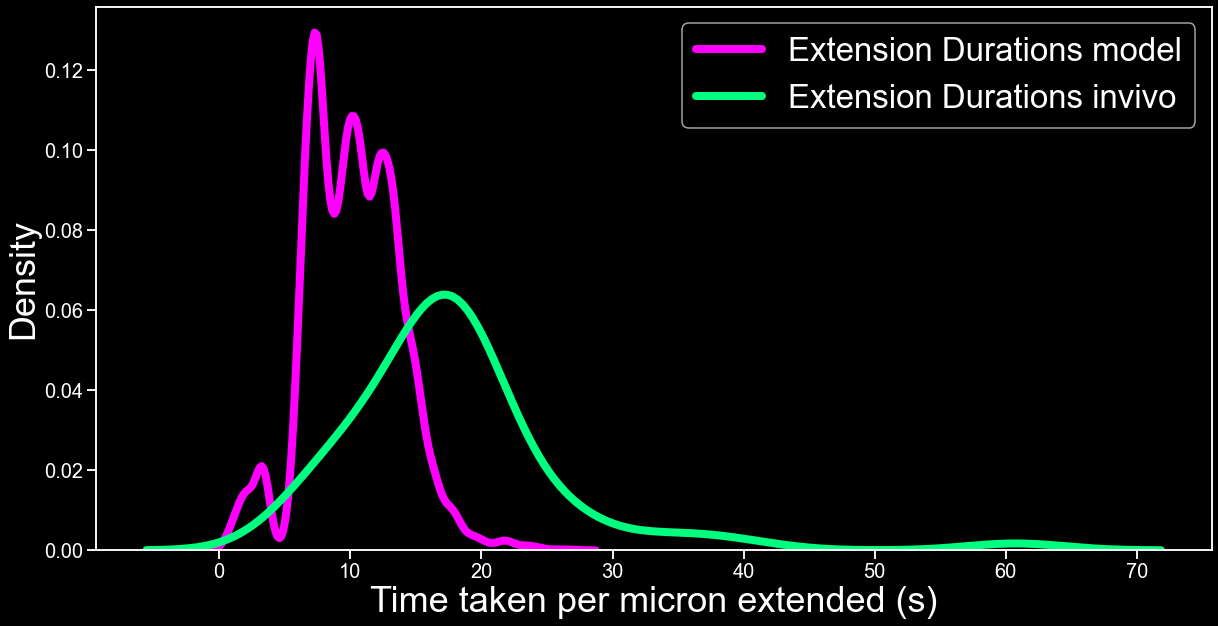

In [186]:
extPlot = plt.subplots(figsize=(20, 10))
extPlot = sns.kdeplot(extArr, 
            color='magenta', 
            shade=False, 
            label='Extension Durations model',
            linewidth=8)
extPlot = sns.kdeplot(extTimesIV, 
            color='SpringGreen', 
            shade=False, 
            label='Extension Durations invivo',
            linewidth=8)
extPlot.legend()
plt.xlabel("Time taken per micron extended (s)")

Text(0.5, 0, 'Time taken per micron retracted (s)')

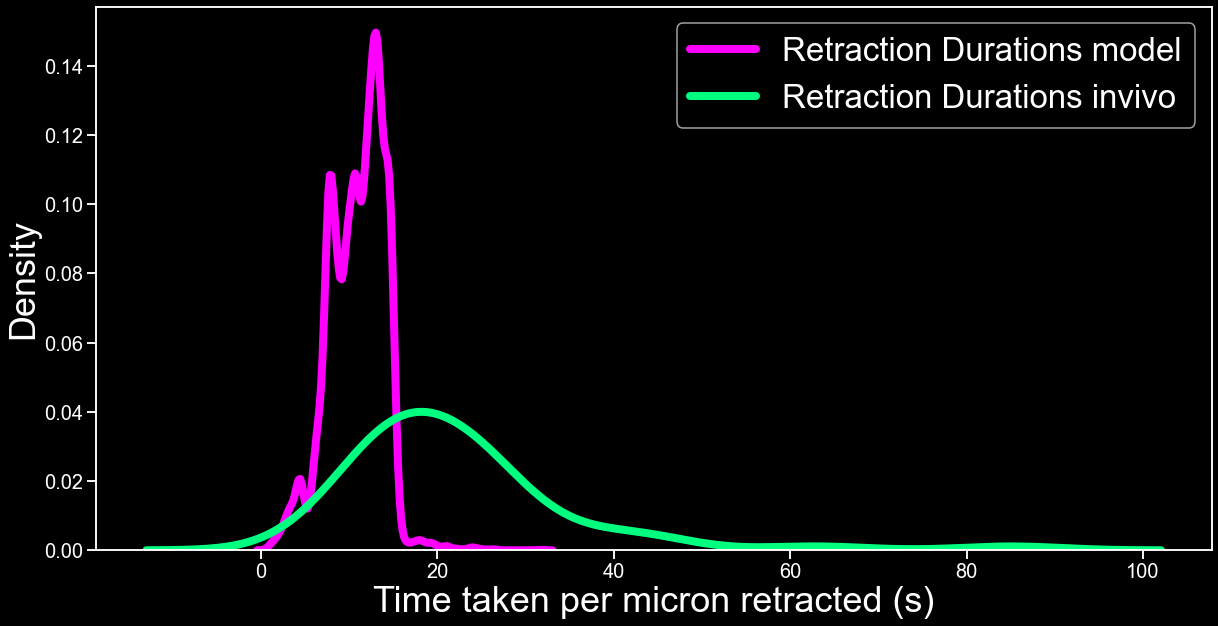

In [187]:
retPlot = plt.subplots(figsize=(20, 10))
retPlot = sns.kdeplot(retArr, 
            color='magenta', 
            shade=False, 
            label='Retraction Durations model',
            linewidth=8)
retPlot = sns.kdeplot(retTimesIV, 
            color='SpringGreen', 
            shade=False, 
            label='Retraction Durations invivo',
            linewidth=8)
retPlot.legend()
plt.xlabel("Time taken per micron retracted (s)")